In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Relative path to the dataset
file_path_Alzheimer = "../../../challenge-02/data/raw/ALZHEIMER_Dataset/Dataset/ADSXLIST_02Dec2024.csv"

# Load the Dataset 
data_Alzheimer = pd.read_csv(file_path_Alzheimer)

print(data_Alzheimer.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PHASE         4884 non-null   object 
 1   PTID          4884 non-null   object 
 2   RID           4884 non-null   int64  
 3   VISCODE       4884 non-null   object 
 4   VISCODE2      4884 non-null   object 
 5   VISDATE       4883 non-null   object 
 6   NAUSEA        4884 non-null   int64  
 7   VOMIT         4884 non-null   int64  
 8   DIARRH        4884 non-null   int64  
 9   CONSTP        4884 non-null   int64  
 10  ABDOMN        4883 non-null   float64
 11  SWEATN        4884 non-null   int64  
 12  DIZZY         4884 non-null   int64  
 13  ENERGY        4884 non-null   int64  
 14  DROWSY        4884 non-null   int64  
 15  VISION        4884 non-null   int64  
 16  HDACHE        4884 non-null   int64  
 17  DRYMTH        4884 non-null   int64  
 18  BREATH        4884 non-null 

In [ ]:
print("Tipos de dados antes da conversão:")
print(data_Alzheimer.dtypes)


for col in data_Alzheimer.columns:
    data_Alzheimer[col] = pd.to_numeric(data_Alzheimer[col], errors='coerce')

Tipos de dados antes da conversão:
PHASE            object
PTID             object
RID               int64
VISCODE          object
VISCODE2         object
VISDATE          object
NAUSEA            int64
VOMIT             int64
DIARRH            int64
CONSTP            int64
ABDOMN          float64
SWEATN            int64
DIZZY             int64
ENERGY            int64
DROWSY            int64
VISION            int64
HDACHE            int64
DRYMTH            int64
BREATH            int64
COUGH             int64
PALPIT            int64
CHEST             int64
URNDIS            int64
URNFRQ            int64
ANKLE             int64
MUSCLE            int64
RASH              int64
INSOMN            int64
DPMOOD            int64
CRYING            int64
ELMOOD            int64
WANDER            int64
FALL              int64
OTHER           float64
ID                int64
SITEID            int64
USERDATE         object
USERDATE2        object
update_stamp     object
dtype: object


In [15]:
print("\nTipos de dados após a conversão:")
print(data_Alzheimer.dtypes)


Tipos de dados após a conversão:
PHASE           float64
PTID            float64
RID               int64
VISCODE         float64
VISCODE2        float64
VISDATE         float64
NAUSEA            int64
VOMIT             int64
DIARRH            int64
CONSTP            int64
ABDOMN          float64
SWEATN            int64
DIZZY             int64
ENERGY            int64
DROWSY            int64
VISION            int64
HDACHE            int64
DRYMTH            int64
BREATH            int64
COUGH             int64
PALPIT            int64
CHEST             int64
URNDIS            int64
URNFRQ            int64
ANKLE             int64
MUSCLE            int64
RASH              int64
INSOMN            int64
DPMOOD            int64
CRYING            int64
ELMOOD            int64
WANDER            int64
FALL              int64
OTHER           float64
ID                int64
SITEID            int64
USERDATE        float64
USERDATE2       float64
update_stamp    float64
dtype: object


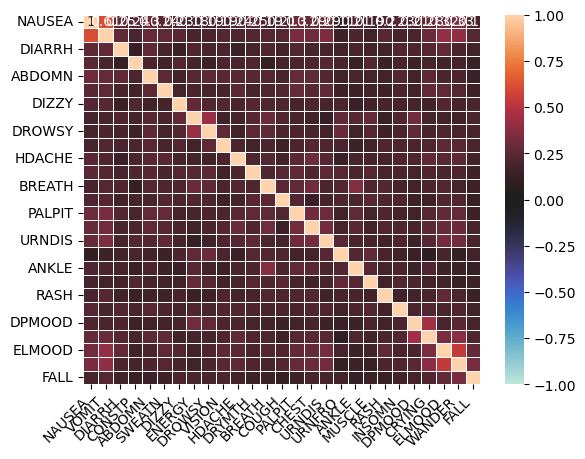

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Drop unicessary columns
data_Alzheimer = data_Alzheimer.drop(columns=['PHASE', 'PTID', "RID", "VISCODE", "VISCODE2", "VISDATE", "SITEID", "USERDATE2", "USERDATE", "update_stamp","ID"])

matrix = data_Alzheimer.drop("OTHER", axis=1).corr(method="pearson")
ax = sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, center=0, linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()


In [ ]:
print(data_Alzheimer.isnull().sum())

data_Alzheimer = data_Alzheimer.dropna()





Number of missing values per column:
NAUSEA    0
VOMIT     0
DIARRH    0
CONSTP    0
ABDOMN    1
SWEATN    0
DIZZY     0
ENERGY    0
DROWSY    0
VISION    0
HDACHE    0
DRYMTH    0
BREATH    0
COUGH     0
PALPIT    0
CHEST     0
URNDIS    0
URNFRQ    0
ANKLE     0
MUSCLE    0
RASH      0
INSOMN    0
DPMOOD    0
CRYING    0
ELMOOD    0
WANDER    0
FALL      0
OTHER     2
dtype: int64


In [ ]:

X = data_Alzheimer.drop(columns=['OTHER'])
y = data_Alzheimer['OTHER']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Corrigir desbalanceamento 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [20]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Data Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_resampled = pca.fit_transform(X_train_resampled)
X_test = pca.transform(X_test)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Epoch 1/20


c:\Users\joaom\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3669 - loss: -234.0429 - val_accuracy: 0.0000e+00 - val_loss: -4714.0728
Epoch 2/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3703 - loss: -23757.9141 - val_accuracy: 0.0000e+00 - val_loss: -104274.8516
Epoch 3/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3735 - loss: -245829.1094 - val_accuracy: 0.0000e+00 - val_loss: -548626.9375
Epoch 4/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3661 - loss: -1064279.8750 - val_accuracy: 0.0000e+00 - val_loss: -1684590.7500
Epoch 5/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3769 - loss: -2854460.2500 - val_accuracy: 0.0000e+00 - val_loss: -3906000.7500
Epoch 6/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3650 - loss: -6360166.5000 - val_accuracy: 0.0000e+00 - val_loss: -7593656.5000
Epoch 7/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3874 - loss: -11737506.0000 - val_accuracy: 0.0000e+00 - val_loss: -13161892.0000

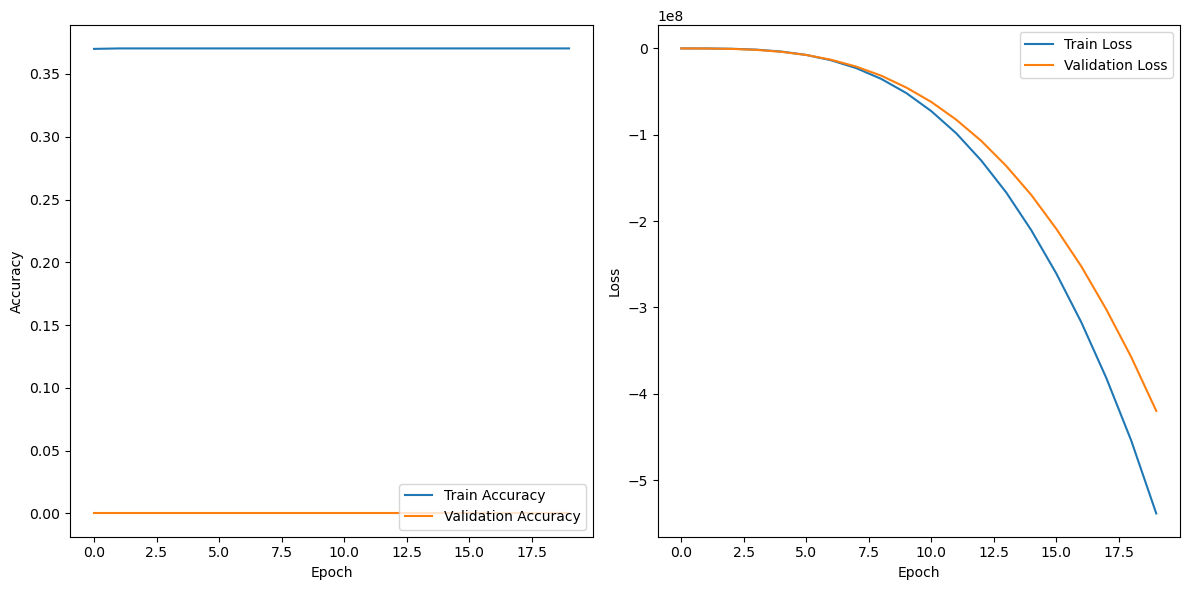

In [22]:
# Neural Network
%pip install tensorflow
%pip install scikeras

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt

# **Definir a função do modelo**
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early Stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo no conjunto completo de treino
model = create_model()
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Avaliação no conjunto de teste
accuracy = model.evaluate(X_test, y_test)[1]
print(f'\nAccuracy on the test set: {accuracy:.2f}')


# Plotar accuracy e loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
